# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Regina Aprilia Roberto
- **Email:** reginaapriliaroberto@gmail.com
- **ID Dicoding:** kancingkuning

- Which particulate matter (PM2.5/PM10) is more frequent in Beijing Train Stations? 
- How is the overall air quality condition around Beijing Train Stations? 
- How is the presence of Good AQI in each stations? 
- What is the correlation between air quality levels and weather factors? 

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat dataset 
path = "/Users/reginaapriliaroberto/Downloads/SUBMISSION/DATA"
all_files = glob.glob(os.path.join(path, "*.csv"))
dataframes = [pd.read_csv(file) for file in all_files]

In [3]:
# Menggabungkan file-file CSV per stasiun
combined_df = pd.concat(dataframes, ignore_index=True)

#Menambah satu kolom datetime 
combined_df['datetime'] = pd.to_datetime(combined_df[['year', 'month', 'day', 'hour']])
combined_df.to_csv("combined_file.csv", index=False)


In [4]:
# Menunjukkan 5 data teratas
combined_df.head(5)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng,2013-03-01 04:00:00


In [5]:
# Menunjukkan nama-nama stasiun
stations_name = combined_df['station'].unique()
print(stations_name)

['Gucheng' 'Huairou' 'Tiantan' 'Changping' 'Guanyuan' 'Nongzhanguan'
 'Wanliu' 'Dongsi' 'Wanshouxigong' 'Aotizhongxin' 'Dingling' 'Shunyi']


**Insight:**

Kolom-kolom yang terdapat pada data dapat dikategorikan sebagai berikut: 

- *Waktu* (year; month; day; hour)

- *Polusi* (PM2.5; PM10; S02; NO2; CO; O3)

- *Faktor Cuaca* (TEMP - Temperatur; PRES - Tekanan; DEWP - Titik Embun; RAIN - Hujan; wd - Arah Angin; WSPM - Kecepatan Angin) 

- *12 Lokasi/Stasiun* (Gucheng; Huairou; Tiantan; Changping; Guanyuan; Nongzhanguan; Wanliu; Dongsi; Wanshouxigong; Aotizhongxin; Dingling; Shunyi)

### Assessing Data

In [6]:
# Informasi dataset
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     412029 non-null  float64       
 6   PM10      414319 non-null  float64       
 7   SO2       411747 non-null  float64       
 8   NO2       408652 non-null  float64       
 9   CO        400067 non-null  float64       
 10  O3        407491 non-null  float64       
 11  TEMP      420370 non-null  float64       
 12  PRES      420375 non-null  float64       
 13  DEWP      420365 non-null  float64       
 14  RAIN      420378 non-null  float64       
 15  wd        418946 non-null  object        
 16  WSPM      420450 non-null  float64    

In [7]:
# Mengecek missing values
combined_df.isnull().sum()

No              0
year            0
month           0
day             0
hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd           1822
WSPM          318
station         0
datetime        0
dtype: int64

In [8]:
# Mengecek data duplikat
print("duplicate_data: ", combined_df.duplicated().sum())

duplicate_data:  0


In [9]:
# Mengecek distribusi data
combined_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000,420768
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386,NaN


**Insight:**
- Terdapat nilai kosong pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM.
- Tidak ditemukan data double/duplikat.
- Data memuat kualitas udara sejak 1 Januari 2013 - 31 Desember 2017 untuk 12 stasiun.

### Cleaning Data

In [10]:
# Menghapus baris dengan missing values di kolom 'wd'
combined_df = combined_df.dropna(subset=['wd'])


In [11]:
# Mengisi missing value hanya pada kolom numerik dengan median
numeric_cols = combined_df.select_dtypes(include=['number']).columns  # Menyaring kolom numeric
combined_df[numeric_cols] = combined_df[numeric_cols].fillna(combined_df[numeric_cols].median())

# Memastikan tidak ada data kosong pada kolom tipe data numerik
print(combined_df.isnull().sum())
print("total kolom:", combined_df.shape[0])



No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64
total kolom: 418946


**Insight:**
- Semua missing value telah diisi, untuk data object/non-numeric (wd) baris dihapus dan untuk data numeric digunakan nilai median.

## Exploratory Data Analysis (EDA)

- PM distribution (based on total count and monthly average)
- Perform numerical data correlation

## Visualization & Explanatory Analysis

### Q1: Which particulate matter (PM2.5/PM10) is more frequent in Beijing Train Stations?

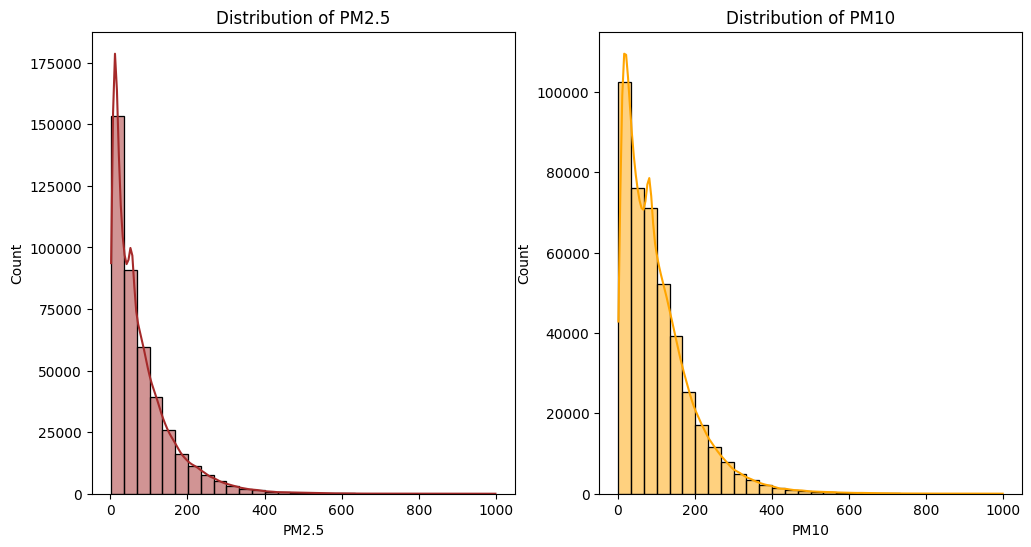

In [12]:
# Distribusi data PM2.5 dan PM10
plt.figure(figsize=(12, 6))

# PM2.5
plt.subplot(1, 2, 1)
sns.histplot(combined_df['PM2.5'], bins=30, kde=True, color='brown')
plt.title('Distribution of PM2.5')

# PM10
plt.subplot(1, 2, 2)
sns.histplot(combined_df['PM10'], bins=30, kde=True, color='orange')
plt.title('Distribution of PM10')

plt.show()


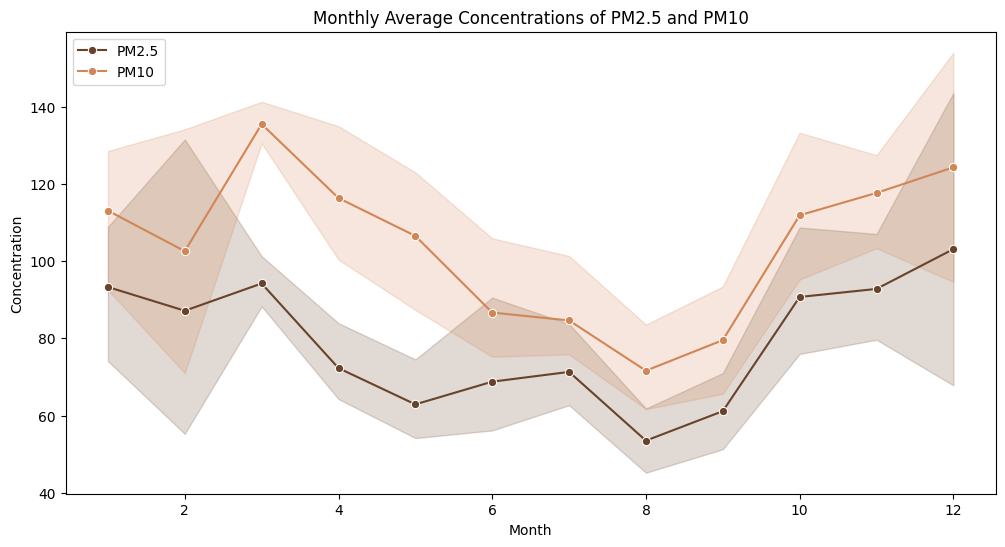

In [13]:
colors = sns.color_palette("copper", 2)
# Rata-rata konsentrasi per bulan
monthly_avg = combined_df.groupby(['year', 'month'])[['PM2.5', 'PM10']].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='PM2.5', data=monthly_avg, label='PM2.5', marker='o', color=colors[0])
sns.lineplot(x='month', y='PM10', data=monthly_avg, label='PM10', marker='o', color=colors[1])
plt.title('Monthly Average Concentrations of PM2.5 and PM10')
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.legend()
plt.show()


**Insight:**
- As per distribution, PM2.5 has higher frequency compare to PM10. At a time, PM10 is higher than PM2.5 based on concentration, as it marks the size of its particle size. 
- Both pollutants peak in early and late months and drop mid-year, this could be due to seasonal change. Lower concentration found in Summer (June-Aug). 

### Q2: How is the overall air quality condition around Beijing Train Stations?  

In [15]:
# Membuat pengelompokan Air Quality Index berdasarkan data PM2.5
def calculate_aqi_pm25(pm25):
    if pm25 <= 12:
        return (pm25 / 12) * 50  # Good
    elif pm25 <= 35.4:
        return ((pm25 - 12.1) / (35.4 - 12.1)) * 50 + 50  # Moderate
    elif pm25 <= 55.4:
        return ((pm25 - 35.5) / (55.4 - 35.5)) * 50 + 100  # Unhealthy for Sensitive Groups
    elif pm25 <= 150.4:
        return ((pm25 - 55.5) / (150.4 - 55.5)) * 100 + 150  # Unhealthy
    elif pm25 <= 250.4:
        return ((pm25 - 150.5) / (250.4 - 150.5)) * 100 + 200  # Very Unhealthy
    elif pm25 > 250.4:
        return 300  # Hazardous
    else:
        return None  # Missing data


combined_df['AQI'] = combined_df['PM2.5'].apply(calculate_aqi_pm25)

def categorize_aqi(aqi):
    if aqi is None:
        return "Unknown"
    elif aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

combined_df['AQI_Category'] = combined_df['AQI'].apply(categorize_aqi)

combined_df[['PM2.5', 'AQI', 'AQI_Category']].head()


,PM2.5,AQI,AQI_Category
0,6.0,25.000000,Good
1,6.0,25.000000,Good
2,5.0,20.833333,Good
3,6.0,25.000000,Good
4,5.0,20.833333,Good


In [16]:
category = combined_df['AQI_Category'].value_counts()
print(category)

AQI_Category
Very Unhealthy                    113702
Moderate                           90736
Unhealthy                          90119
Good                               62640
Unhealthy for Sensitive Groups     61749
Name: count, dtype: int64


/var/folders/xl/0vxlkkrs2fg1z2tk2jw59v940000gn/T/ipykernel_6403/454818225.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(


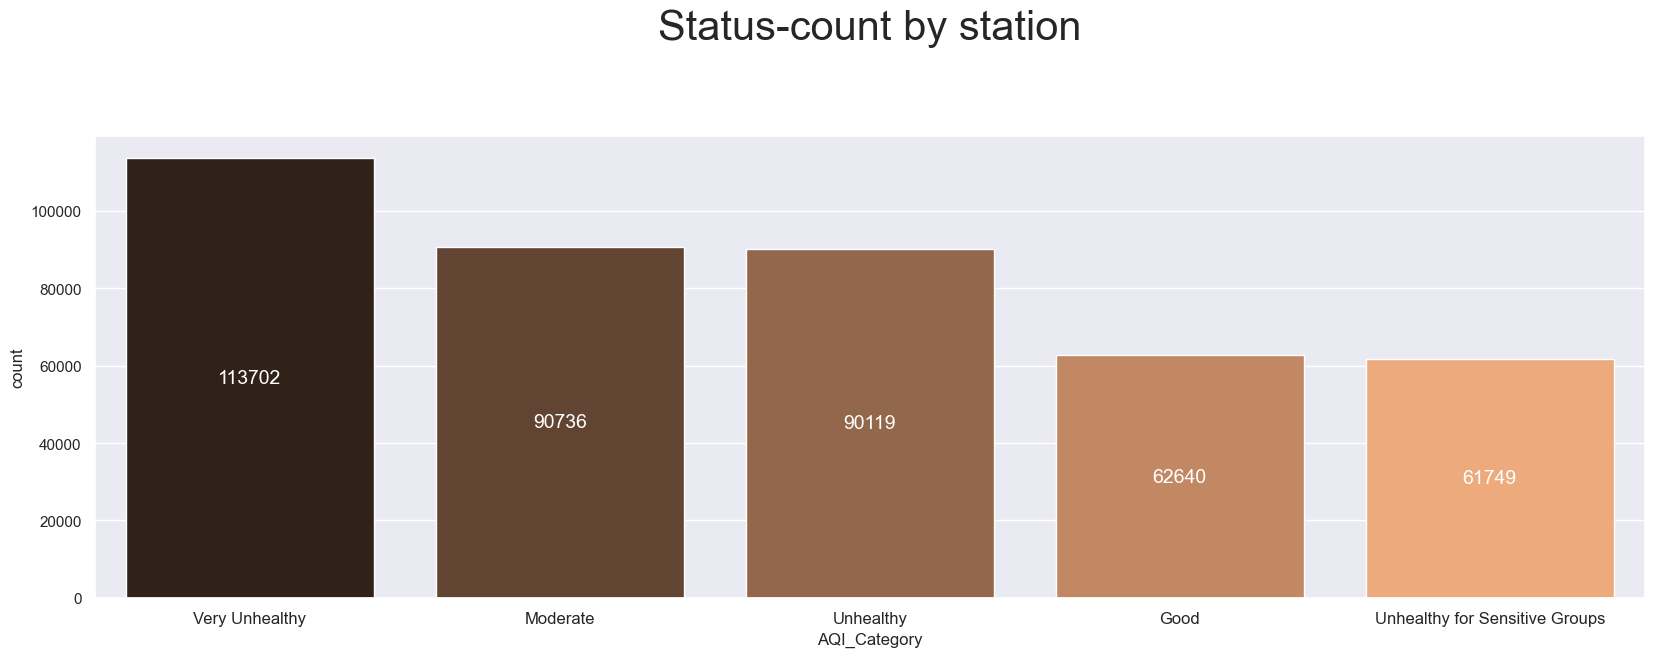

In [ ]:
# Membuat diagram batang AQI Index
sns.set(rc={'figure.figsize': (20, 6)})

plt.xticks(fontsize=12)
p = sns.countplot(
    x=combined_df['AQI_Category'],  # Specify x-axis
    order=combined_df['AQI_Category'].value_counts().sort_values(ascending=False).index, 
    palette='copper'
)


for container in p.containers:
    p.bar_label(container, label_type='center', fontsize=14, color='white')  # angka di dalam bar

# Judul
p.axes.set_title("Status-count by station\n\n", fontsize=30)

# Memunculkan grafik
plt.show()


**Insights:**
- A total value of 113702 labeled very unhealthy air quality on 1st position based on count of all station.
- Total count of moderate and unhealthy air quality levels are closely similar, which is the same as good and uhealthy for sensitive groups. 

### Q3: How is the presence of Good AQI in each stations documented? 

Total unique stations with 'Good' air quality: 12

Percentage of 'Good' AQI occurrences per station:
station
Dingling         12.421775
Huairou           9.573755
Shunyi            8.908046
Changping         8.735632
Nongzhanguan      7.946999
Dongsi            7.908685
Wanshouxigong     7.894317
Tiantan           7.702746
Wanliu            7.412197
Gucheng           7.388250
Aotizhongxin      7.345147
Guanyuan          6.762452
Name: count, dtype: float64


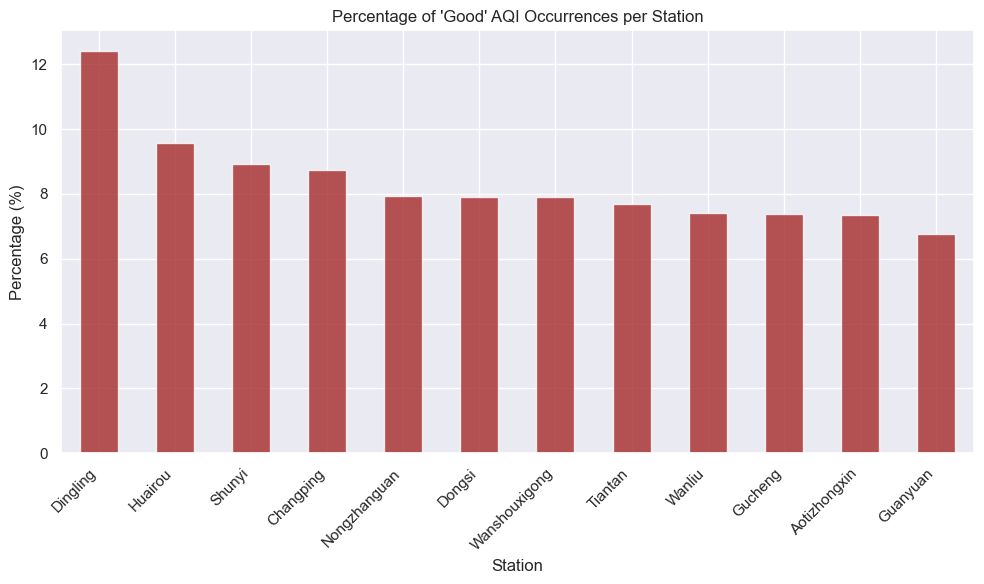

In [25]:
# Filter data for stations with "Good" AQI
stations_with_good_AQI = combined_df[combined_df['AQI_Category'] == 'Good']

# Count the number of occurrences for each station
stations_count = stations_with_good_AQI['station'].value_counts()

# Calculate the percentage for each station
total_good_occurrences = stations_count.sum()  # Total occurrences of "Good" AQI
stations_percentage = (stations_count / total_good_occurrences) * 100

# Display the results
print(f"Total unique stations with 'Good' air quality: {stations_count.nunique()}")
print("\nPercentage of 'Good' AQI occurrences per station:")
print(stations_percentage.sort_values(ascending=False))

# Optional: Visualize the percentages
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
stations_percentage.sort_values(ascending=False).plot(kind='bar', color='brown', alpha=0.8)

plt.title("Percentage of 'Good' AQI Occurrences per Station")
plt.ylabel("Percentage (%)")
plt.xlabel("Station")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Insight:**
- Dingling is noted as the station with Good percentage of AQI occurence for most of times with only around 12.4%. 
- Guanyuan is on the last position for stations with percentage of Good AQI level (6.7%).

### Q4: What is the correlation between air quality levels and weather factors? 

In [26]:
# Mengubah data kategori menjadi ordinal
aqi_mapping = {
    'Good': 1,
    'Moderate': 2,
    'Unhealthy for Sensitive Groups': 3,
    'Unhealthy': 4,
    'Very Unhealthy': 5,
    'Hazardous': 6
}

combined_df['AQI_Ordinal'] = combined_df['AQI_Category'].map(aqi_mapping)


In [27]:
# Korelasi AQI dengan faktor cuaca
weather_factors = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Include AQI Ordinal in the correlation calculation
correlation_matrix = combined_df[['AQI_Ordinal'] + weather_factors].corr()

# Display the correlation matrix
print(correlation_matrix)


             AQI_Ordinal     PM2.5      PM10       SO2       NO2        CO  \
AQI_Ordinal     1.000000  0.781511  0.718656  0.433203  0.596822  0.608603   
PM2.5           0.781511  1.000000  0.879313  0.478632  0.658620  0.767113   
PM10            0.718656  0.879313  1.000000  0.459332  0.646021  0.686163   
SO2             0.433203  0.478632  0.459332  1.000000  0.492188  0.524328   
NO2             0.596822  0.658620  0.646021  0.492188  1.000000  0.688013   
CO              0.608603  0.767113  0.686163  0.524328  0.688013  1.000000   
O3             -0.077068 -0.147198 -0.109497 -0.162288 -0.463421 -0.303478   
TEMP            0.002833 -0.130081 -0.095055 -0.318815 -0.273096 -0.317340   
PRES           -0.094641  0.018675 -0.018093  0.220807  0.170381  0.183607   
DEWP            0.262864  0.113526  0.070332 -0.264013 -0.030159 -0.055889   
RAIN           -0.004288 -0.014240 -0.026307 -0.039880 -0.043188 -0.012751   
WSPM           -0.337797 -0.269402 -0.182157 -0.108450 -0.394054

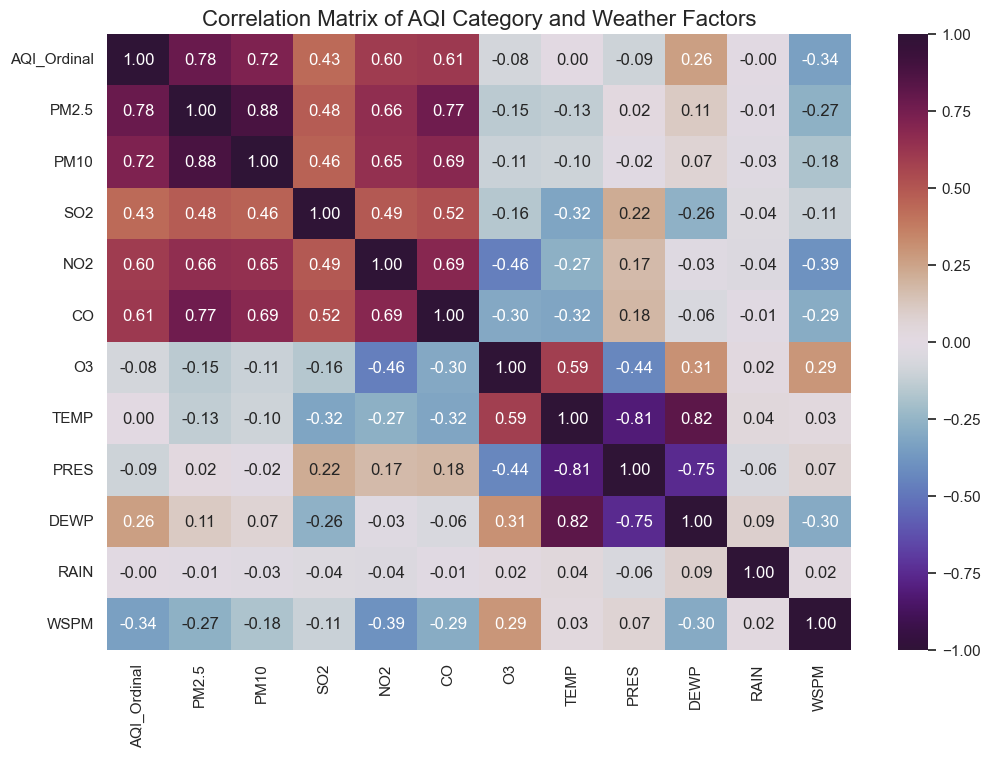

In [29]:

# Visualisasi heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='twilight_shifted', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix of AQI Category and Weather Factors", fontsize=16)
plt.show()


**Insight:**
- Higher PM2.5 levels are strongly linked to worse air quality. As PM2.5 increases, the air quality category shifts towards unhealthy levels.
- Temperature has little to no impact on air quality, as there's almost no correlation with AQI.
- Rainfall also shows minimal effect on air quality, suggesting it doesn't play a significant role in improving or worsening the AQI in this dataset.


## Conclusion

**Q1: PM2.5 found more frequent compared to PM10 in train stations, likely due to emissions from fuel combustion, such as diesel engines. As PM10 comes from a wider range of sources like dust, construction, and agriculture.**

**Q2: Air quality at the documented stations is predominantly poor (Very Unhealthy), which is correlate with the occurence of more PM2.5.**

**Q3: Even the highest percentage of "Good" AQI occurrences (Dingling - 12.4%) does not exceed a quarter of 50%, reflecting the persistent of bad air quality across all stations in Beijing.**

**Q4: Weather conditions like temperature, rain, and wind speed have a minor role in air quality variations, other pollutants (SO2, NO2, and CO) also contribute to worsening air quality but to a lesser extent compare to PM2.5 and PM10**